In [2]:

# In terminal
# pip install pythontsa
# pip install --upgrade matplotlib
import os
import pandas as pd
import matplotlib.pyplot as plt

from PythonTsa.plot_acf_pacf import acf_pacf_fig
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from PythonTsa.datadir import getdtapath
from PythonTsa.Selecting_arma2 import choose_arma2


path = "/Users/ruting/Documents/Github/pyTSA/ATSSB_ARMA_and_ARIMA_Modeling_Forecasting"
os.chdir(path)

dtapath=getdtapath()
nao=pd.read_csv(dtapath +'nao.csv', header=0)
timeindex=pd.date_range('1950-01', periods=len(nao),freq='M')
nao.index=timeindex
naots=nao['index']


In [3]:
naotsrd=sm.tsa.arma_order_select_ic(naots, max_ar=2,
             max_ma=1, ic=['aic', 'bic', 'hqic'], trend='n')
naotsrd.aic_min_order
naotsrd.bic_min_order
naotsrd.hqic_min_order

aord=sm.tsa.arma_order_select_ic(naots, max_ar=4, max_ma=4,
         ic=['aic', 'bic', 'hqic'], trend='n')
aord.aic_min_order
aord.bic_min_order
aord.hqic_min_order
 
choose_arma2(naots, max_p=4, max_q=4, ctrl=1.02)
arma32=ARIMA(naots, order=(3,0,2), trend='n').fit()
print(arma32.summary())

/Users/ruting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ruting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ruting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ruting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ruting

AIC:  
          0        1        2        3        4
0      NaN  2360.74  2359.83  2360.71  2360.95
1  2358.01  2359.35  2361.32  2359.22  2362.00
2  2359.35  2361.34  2360.26  2361.99      NaN
3  2361.32  2359.75      NaN  2363.01      NaN
4  2362.02  2361.36  2363.32  2360.36  2363.89
AIC minimum is 2358.01
(p, q)= (array([1]), array([0]))
BIC:  
          0        1        2        3        4
0      NaN  2374.91  2378.72  2384.32  2389.28
1  2372.18  2378.24  2384.94  2387.55  2395.06
2  2378.24  2384.95  2388.59  2395.05      NaN
3  2384.93  2388.08      NaN  2400.79      NaN
4  2390.35  2394.42  2401.10  2402.87  2411.12
BIC minimum is 2372.18
(p, q)= (array([1]), array([0]))
HQIC:  
          0        1        2        3        4
0      NaN  2366.17  2367.07  2369.76  2371.81
1  2363.45  2366.60  2370.38  2370.08  2374.68
2  2366.59  2370.39  2371.12  2374.67      NaN
3  2370.37  2370.61      NaN  2377.49      NaN
4  2372.88  2374.04  2377.81  2376.66  2382.00
HQIC minimum is 2

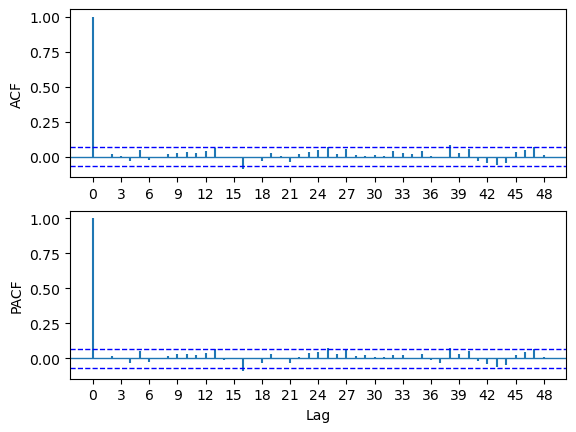

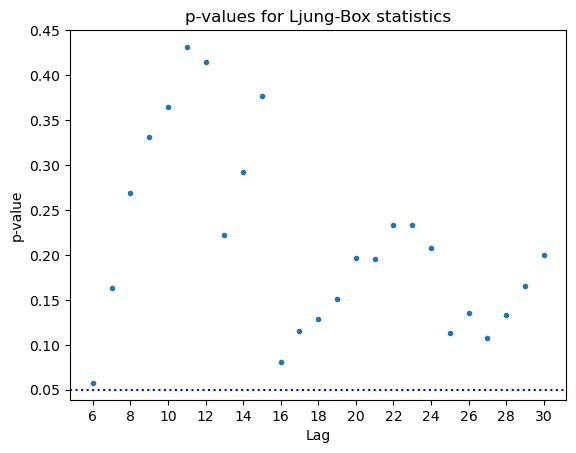

In [4]:

residarma32 = arma32.resid
acf_pacf_fig(residarma32, both=True, lag=48)
plt.savefig('residarma43ACFprob401.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.savefig('residarma43ACFprob401.eps', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.show()

plot_LB_pvalue(residarma32, noestimatedcoef=5, nolags=30)

plt.savefig('residarma43LBpVprob401.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.savefig('residarma43LBpVprob401.eps', dpi = 1200, 
            bbox_inches ='tight', transparent = True)

plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -732.871
Date:                Mon, 16 Jun 2025   AIC                           1473.743
Time:                        19:39:28   BIC                           1490.601
Sample:                             0   HQIC                          1480.358
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5113      0.038     39.602      0.000       1.436       1.586
ar.L2         -1.3035      0.051    -25.604      0.000      -1.403      -1.204
ar.L3          0.4659      0.040     11.527      0.0

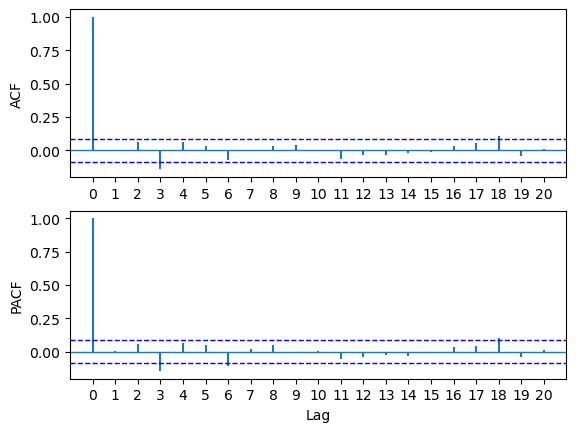

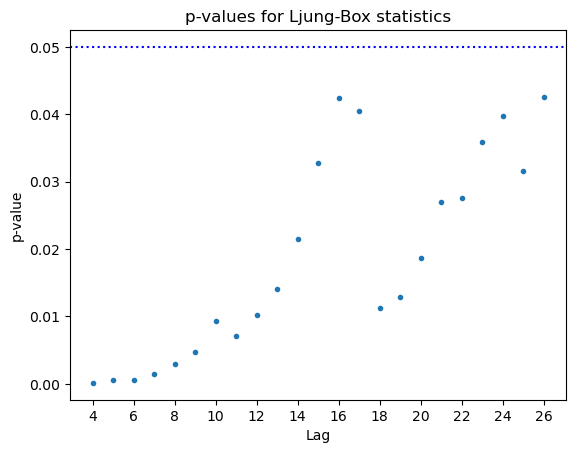

In [5]:

import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA   

ar=np.array([1, -0.8, 0.6])
ma=np.array([1, 0.7, 0.4])
np.random.seed(12357)
y=arma_generate_sample(ar=ar, ma=ma, nsample=500)
y=pd.Series(y, name='y')

arma30=ARIMA(y, order=(3,0,0),trend='n').fit()
print(arma30.summary())
resid30 = arma30.resid

acf_pacf_fig(resid30, both=True, lag=20)

plt.savefig('resid30ACFProb42.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.savefig('resid30ACFProb42.eps', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.show()

plot_LB_pvalue(resid30, noestimatedcoef=3, nolags=26)
plt.savefig('resid30pVProb42.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.savefig('resid30pVProb42.eps', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.show()